# Project(Programming Basics and Data Analytics with Python)

In [1]:
#Importing library
import numpy as np
import pandas as pd

### 1 : Load the data file using pandas. 

In [2]:
#Reading csv file with read_csv

googleplaystore = pd.read_csv('googleplaystore2.csv')

In [3]:
#Making copy of dataset
storedata= googleplaystore.copy(deep=True)

In [4]:
storedata.shape

(10841, 13)

In [5]:
#checking columns.
storedata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
storedata.info()   # understanding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
storedata.describe() #checking count, mean median, mode std and quantile of int variable. 

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
# check top 5 columns 
storedata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 2: Check for null values in the data. Get the number of null values for each column.

In [9]:
#cheking null values

#Rating feature has 1474 null value
#Type has 1 null value
#Content rating has 1 null value
#Current var has 8 null values
#Android Var 3 null values
storedata.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##  3: Drop records with nulls in any of the columns. 

In [10]:
#Dropping null values

#Finding---> Before dropping null values total records were (10841, 13)
#Finding---> After dropping null values total records are   (9360 ,13)

storedata=storedata.dropna()
storedata.shape

(9360, 13)


##  4 : Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

### 4:1  Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

        1:1 Extract the numeric value from the column

        1:2 Multiply the value by 1,000, if size is mentioned in Mb

In [11]:
storedata.Size = storedata.Size.replace('Varies with device','0k')

storedata['Measure'] = storedata['Size'].str[-1:]
storedata['Size']=storedata['Size'].replace({'M':'', 'k':'', 'K':''}, regex=True)

#change datatype
storedata['Size']=storedata['Size'].astype(float)

storedata['Size'] = np.where(storedata['Measure'] == 'M',storedata['Size'] * 1000,storedata['Size'])

In [12]:
storedata = storedata.drop(['Measure'], axis =1)
storedata.Size.tail(15)
# Now we have removed the 'M' and 'k' alphabet from the data and multiply those values where 'M' is present

10817     8000.0
10819     3600.0
10820     8600.0
10826        0.0
10827    13000.0
10828    13000.0
10829     7400.0
10830     2300.0
10832      582.0
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10839        0.0
10840    19000.0
Name: Size, dtype: float64

## 4: 2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).



In [13]:
storedata['Reviews']=storedata['Reviews'].astype(int)   #coverting datatype of review to int from string

In [14]:
storedata['Reviews'].dtypes

dtype('int32')

In [15]:
storedata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
storedata.shape

(9360, 13)

## 4: 3 Installs field is currently stored as string and has values like 1,000,000+. 

        Treat 1,000,000+ as 1,000,000

        remove ‘+’, ‘,’ from the field, convert it to integer

In [17]:
storedata['Installs']=storedata['Installs'].str[:-1]

In [18]:
storedata['Installs']=storedata['Installs'].replace(",","",regex=True).astype(int)
#removing "+" and "," from "Installs" field. 

In [19]:
storedata['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [20]:
storedata.shape

(9360, 13)

##  4:4 Price field is a string and has dollar symbol. Remove dollar sign, and convert it to numeric.

In [21]:
storedata.Price = storedata.Price.str.lstrip("$").astype(float) 
#removing "$" sign from "Price" field and converting it int.

In [22]:
storedata.Price.dtypes

dtype('float64')

In [23]:
storedata['Price'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [24]:
storedata.shape

(9360, 13)

# 5: Sanity checks:

## 5:1 Average rating should be between 1 and 5 as only these values are allowed on the play store. 

Drop the rows that have a value outside this range.

In [25]:
df_filtered = storedata[storedata['Rating'] < 1],storedata[storedata['Rating'] >5]
df_filtered
#"Rating" field has no value <1 and  >5 it seems, because when I checked the shape before and after it is the same.


(Empty DataFrame
 Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
 Index: [],
 Empty DataFrame
 Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
 Index: [])

In [26]:
storedata.shape

(9360, 13)

## 5:2 Reviews should not be more than installs as only those who installed can review the app. 

If there are any such records, drop them.



In [27]:
storedata.shape

(9360, 13)

In [28]:
temp = storedata.drop(storedata[(storedata.Reviews) > (storedata.Installs)].index, inplace=True, axis=0)
print(temp)
print(storedata.shape)
# 7 Review field had value more than Installs, which has been dropped.

None
(9353, 13)


## 5:3For free apps (type = “Free”), the price should not be >0. Drop any such rows

In [29]:
temp1 = storedata.drop(storedata[(storedata.Type=='Free') & (storedata.Price>0)].index, inplace=True,axis=0)
print(temp1)
# No Free App is having Price less than 0.

None


In [30]:
storedata.shape

(9353, 13)

## 5: Performing univariate analysis: 

###  - Boxplot for Price

- Are there any outliers? Think about the price of usual apps on Play Store.


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

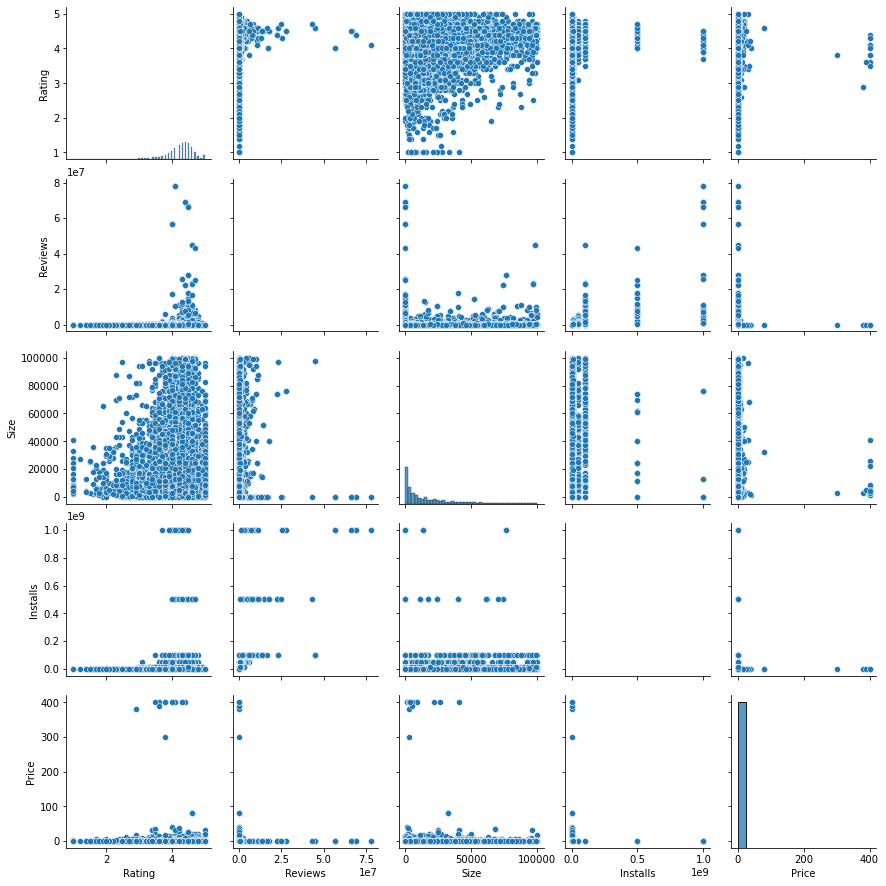

In [32]:
sns.pairplot(storedata)
# pairplot shows all possible relationship among all the variables.

{'whiskers': [<matplotlib.lines.Line2D at 0x2d97e5fd280>,
 'caps': [<matplotlib.lines.Line2D at 0x2d97e60d490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d97e5fdfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d97e62efa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d97e62e280>],
 'means': []}

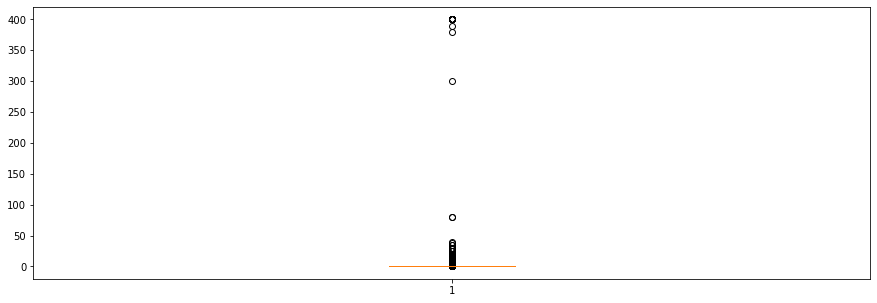

In [33]:
plt.figure(figsize=(15,5))
plt.boxplot(storedata['Price'])
# boxplot shows that Price field is having outliers.

## Boxplot for Reviews

- Are there any apps with very high number of reviews? Do the values seem right?


{'whiskers': [<matplotlib.lines.Line2D at 0x2d97e7c9f40>,
 'caps': [<matplotlib.lines.Line2D at 0x2d97e7daa00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d97e7b8700>],
 'medians': [<matplotlib.lines.Line2D at 0x2d97e7eaa30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d97e7fbf70>],
 'means': []}

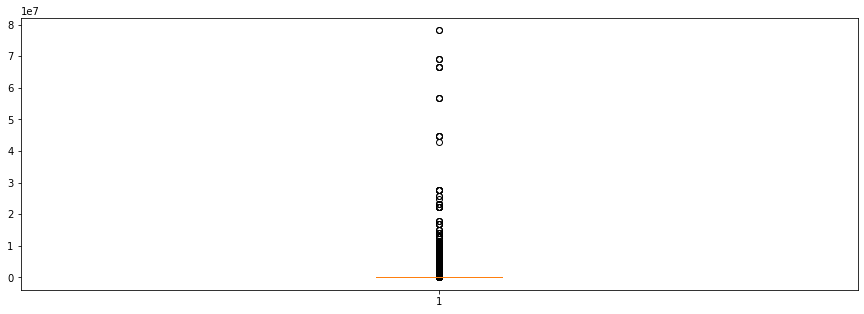

In [34]:
plt.figure(figsize=(15,5))
plt.boxplot(storedata['Reviews'])
#Reviews field is also having outliers.
# There is having fewer apps where reviews are higher number

## Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?



(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

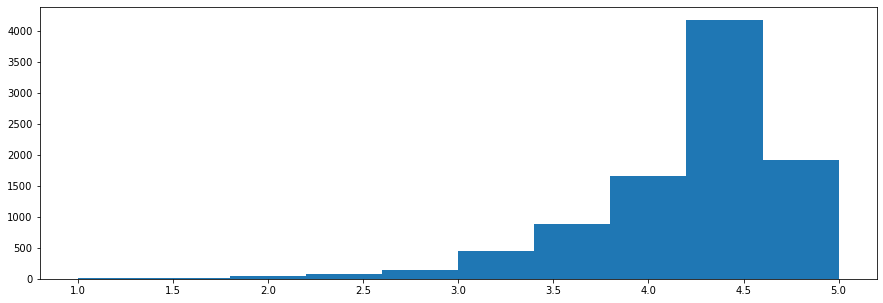

In [35]:
plt.figure(figsize=(15,5))
plt.hist(storedata.Rating)
# The rating is not noramlly distributed because there is left skew and 
#the rating values is more towards higher ratings.

## Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

 



(array([4779., 1386., 1036.,  617.,  464.,  334.,  234.,  174.,  125.,
         204.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

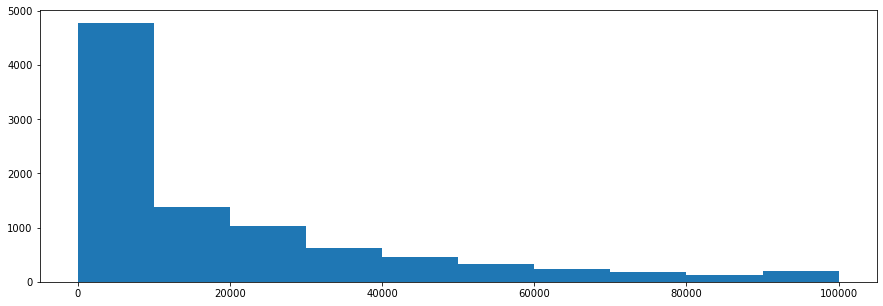

In [36]:
plt.figure(figsize=(15,5))
plt.hist(storedata.Size)
# Size column is not normally distributed because it is having right skew.

## 6:1 Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

6:1: Check out the records with very high price

6:1:1 Is 200 indeed a high price?

6:1:2 Drop these as most seem to be junk apps

In [37]:
storedata.describe()

,Rating,Reviews,Size,Installs,Price
count,9353.000000,9.353000e+03,9353.000000,9.353000e+03,9353.000000
mean,4.191254,5.147606e+05,18957.610660,1.792215e+07,0.961467
std,0.515010,3.146169e+06,23025.327915,9.129920e+07,15.827539
min,1.000000,1.000000e+00,0.000000,5.000000e+00,0.000000
25%,4.000000,1.870000e+02,2400.000000,1.000000e+04,0.000000
50%,4.300000,5.967000e+03,9500.000000,5.000000e+05,0.000000
75%,4.500000,8.174700e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [38]:
#Outlier Treatment
Q1=np.percentile(storedata['Price'],25)
Q3=np.percentile(storedata['Price'],75)
print(Q1)
print(Q3)
IQR = Q3-Q1

0.0
0.0


In [39]:
outlier = storedata.Price[(storedata['Price'] > Q3+1.5*IQR) | (storedata['Price'] < Q1-1.5*IQR)]
print(outlier.unique())

[  4.99   3.99   6.99   7.99   5.99   2.99   3.49   1.99   9.99   7.49
   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99  14.99  29.99
  12.99   2.49  10.99   1.5   19.99  15.99  33.99  39.99   3.95   4.49
   1.7    8.99   1.49   3.88 399.99  17.99 400.     3.02   1.76   4.84
   4.77   1.61   2.5    1.59   6.49   1.29 299.99 379.99  37.99  18.99
 389.99   8.49   1.75  14.     2.     3.08   2.59  19.4    3.9    4.59
  15.46   3.04  13.99   4.29   3.28   4.6    1.     2.95   2.9    1.97
   2.56   1.2 ]


In [40]:
storedata.shape

(9353, 13)

In [41]:
print(storedata[storedata.Price>200].shape)

price_outliers = storedata[storedata.Price>200].index
print(storedata.drop(labels=price_outliers, inplace=True))

#I am putting all the values more than $200 from Price col into a different variable (Price_outlier) and dropping it.
#I got 15 records where value is more than $200 in price col.

(15, 13)
None


In [42]:
storedata.shape
#After dropping the records my new shape is 9338,13.

(9338, 13)

### 6:2 Reviews: Very few apps have very high number of reviews. 
    
These are all star apps that don’t help with the analysis and, in fact, will skew it. 

Drop records having more than 2 million reviews.



In [43]:
storedata.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int32

In [44]:
storedata['Reviews'].describe()

count    9.338000e+03
mean     5.155865e+05
std      3.148627e+06
min      1.000000e+00
25%      1.880000e+02
50%      6.009000e+03
75%      8.247100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [45]:
storedata.shape

(9338, 13)

In [46]:
# Outlier Treatment
Q1 = np.percentile(storedata.Reviews,25)
Q3 = np.percentile(storedata.Reviews,75)
IQR = Q3-Q1
print(IQR)

82283.0


In [47]:
reviews_outliers = storedata[(storedata.Reviews>Q3+1.5*IQR) | (storedata.Reviews<Q1-1.5*IQR)]
print(reviews_outliers.shape)

(1628, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x2d97c601190>,
 'caps': [<matplotlib.lines.Line2D at 0x2d97c66ddf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d97c6018e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d97c64e8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d97c64e730>],
 'means': []}

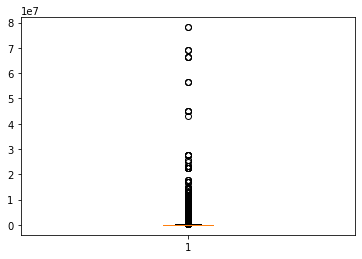

In [48]:
plt.boxplot(storedata.Reviews)

In [49]:
# Dropping all those values which are greater than 2 million.
higher_values = storedata[storedata.Reviews > 2000000].index

In [50]:
storedata.drop(labels=higher_values,inplace=True)

In [51]:
storedata.shape

(8885, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d97db9cc40>,
 'caps': [<matplotlib.lines.Line2D at 0x2d97dbc9ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d97db7c220>],
 'medians': [<matplotlib.lines.Line2D at 0x2d97dbf9b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d97dc170a0>],
 'means': []}

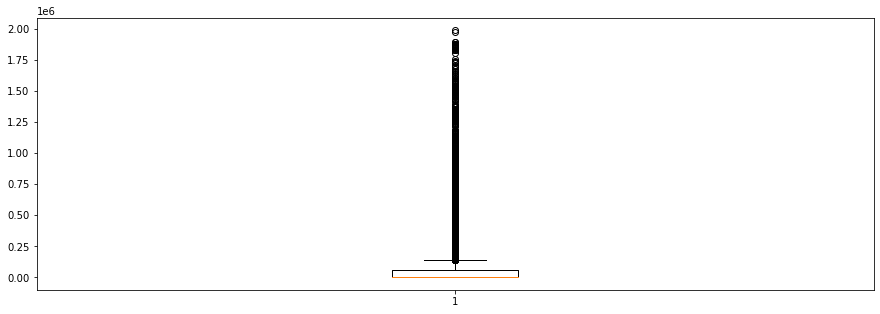

In [52]:
plt.figure(figsize=(15,5))
plt.boxplot(storedata.Reviews)

## 6:3 Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

6:3:1 Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

6:3:2 Decide a threshold as cutoff for outlier and drop records having values more than that

In [53]:
from scipy import stats

In [54]:
#Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

inst_percentage = np.percentile(storedata['Installs'],[10, 25, 50, 70, 90, 95, 99])
print(inst_percentage)

[1.e+03 1.e+04 5.e+05 1.e+06 1.e+07 1.e+07 1.e+08]


In [55]:
higher_values = storedata[storedata.Installs > 4000000].index
print(storedata.drop(higher_values, inplace = True))

#I have decided threshold value 4000000 for installs.
# Dropped records from Installs col which have value more than 4000000.

None


{'whiskers': [<matplotlib.lines.Line2D at 0x2d974c09a60>,
 'caps': [<matplotlib.lines.Line2D at 0x2d97e9a7790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d974beec10>],
 'medians': [<matplotlib.lines.Line2D at 0x2d97eb00d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d97eb001c0>],
 'means': []}

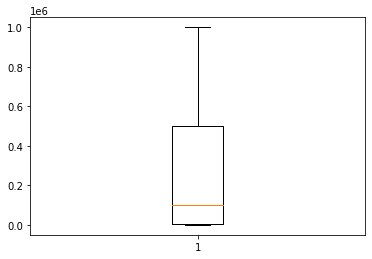

In [56]:
plt.boxplot(storedata.Installs)

In [57]:
storedata.describe()

,Rating,Reviews,Size,Installs,Price
count,6506.000000,6506.000000,6506.000000,6506.000000,6506.000000
mean,4.139179,9570.197510,17686.647940,306741.901322,0.477678
std,0.582584,22904.190881,20629.452985,413243.643015,2.584501
min,1.000000,1.000000,0.000000,5.000000,0.000000
25%,3.900000,63.000000,3300.000000,5000.000000,0.000000
50%,4.200000,754.000000,9300.000000,100000.000000,0.000000
75%,4.500000,7960.500000,25000.000000,500000.000000,0.000000
max,5.000000,376223.000000,100000.000000,1000000.000000,79.990000


In [58]:
storedata.shape

(6506, 13)

## 7: Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

### 7:1 Make scatter plot/joinplot for Rating vs. Price

### 7:1:1 What pattern do you observe? Does rating increase with price?

In [59]:
storedata.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.143262,0.020782,0.083023,0.037068
Reviews,0.143262,1.000000,0.129941,0.586410,-0.035443
Size,0.020782,0.129941,1.000000,0.135565,0.026597
Installs,0.083023,0.586410,0.135565,1.000000,-0.115303
Price,0.037068,-0.035443,0.026597,-0.115303,1.000000


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.0, 1.0, 'Rating vs Price')

<Figure size 1080x360 with 0 Axes>

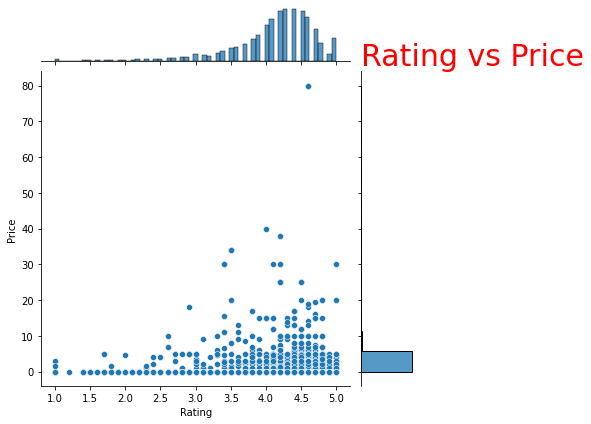

In [61]:
plt.figure(figsize=(15,5))
sns.jointplot('Rating','Price',kind='scatter',data = storedata)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating vs Price',loc='left', fontsize=30, color='red')

### It's explicitly illustrated that the rating is not increasing the price because both variables are less positively correlated and the value of positiveness is "0.037068"

## 7:2Make scatter plot/joinplot for Rating vs. Size

### 7:2:1 Are heavier apps rated better?


In [62]:
import scipy

In [63]:
correlation, p_value = scipy.stats.pearsonr(storedata.Rating,storedata.Size)
correlation, p_value

(0.020781510018186792, 0.09372038552361163)

#### Both variables have less positive correlation

Text(0.0, 1.0, 'Rating vs Size')

<Figure size 1080x360 with 0 Axes>

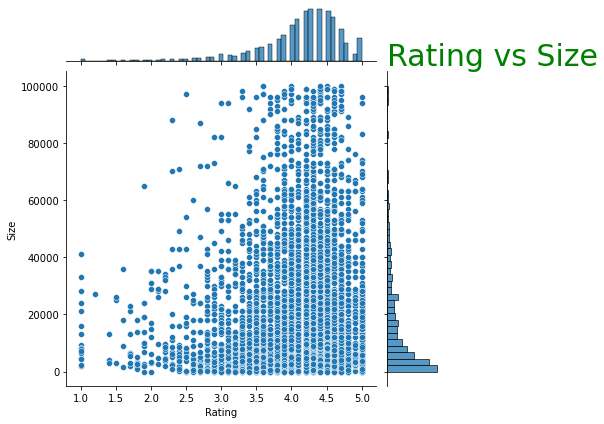

In [64]:
plt.figure(figsize=(15,5))
sns.jointplot(data=storedata, x="Rating", y="Size", kind = 'scatter')
plt.xlabel('Rating')
plt.ylabel('Size')
plt.title('Rating vs Size',loc='left', fontsize=30, color='green')

### As explicitly illustrated that havier apps does not rate better

## 7:3Make scatter plot/joinplot for Rating vs. Reviews

### 7:3:1 Does more review mean a better rating always?

In [65]:
correlation, p_value = scipy.stats.pearsonr(storedata.Rating,storedata.Reviews)
correlation, p_value

(0.14326174919474388, 3.5319175063634705e-31)

#### Both variables have positive correlation

Text(0.0, 1.0, 'Rating vs Reviews')

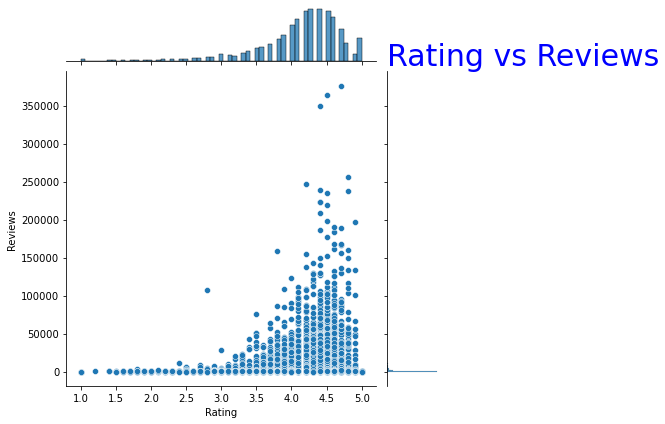

In [66]:
sns.jointplot(data=storedata, x="Rating", y="Reviews")
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Rating vs Reviews',loc='left', fontsize=30, color='blue')

### As we can see that Rating and Reviews are positively correlated. It shows, more Review means better Rating.

## 7:4 Make boxplot for Rating vs. Content Rating

### 7:4:1 Is there any difference in the ratings? Are some types liked better?


In [67]:
storedata.groupby(['Content Rating'])['Rating'].mean()

Content Rating
Adults only 18+    4.300000
Everyone           4.137084
Everyone 10+       4.173239
Mature 17+         4.066561
Teen               4.181280
Unrated            4.100000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Content Rating vs Rating')

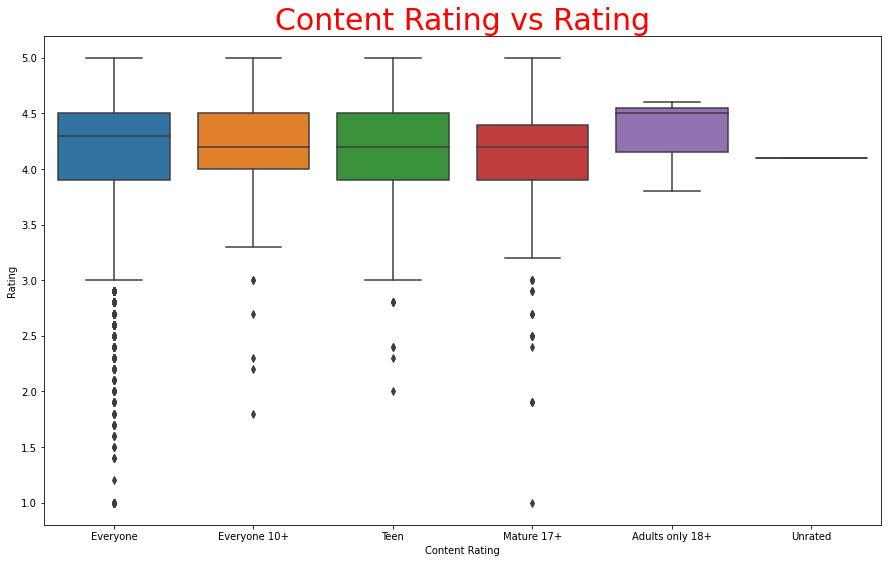

In [68]:
plt.figure(figsize=(15,9))
sns.boxplot(x ='Content Rating', y = 'Rating' , data = storedata)
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.title('Content Rating vs Rating',loc='center', fontsize=30, color='red')

### By seeing below boxplot I can say that Adult only 18+ is having better Rating because it does not having outliers.

## 7:5 Make boxplot for Ratings vs. Category

### 7:5:1 Which genre has the best ratings?


In [69]:
storedata.groupby(['Category'])['Rating'].mean()

Category
ART_AND_DESIGN         4.367308
AUTO_AND_VEHICLES      4.176471
BEAUTY                 4.280000
BOOKS_AND_REFERENCE    4.329927
BUSINESS               4.092857
COMICS                 4.150000
COMMUNICATION          4.032298
DATING                 3.940237
EDUCATION              4.344444
ENTERTAINMENT          4.117647
EVENTS                 4.455814
FAMILY                 4.172035
FINANCE                4.104089
FOOD_AND_DRINK         4.121519
GAME                   4.165709
HEALTH_AND_FITNESS     4.195215
HOUSE_AND_HOME         4.130000
LIBRARIES_AND_DEMO     4.200000
LIFESTYLE              4.086792
MAPS_AND_NAVIGATION    3.968889
MEDICAL                4.185260
NEWS_AND_MAGAZINES     4.101714
PARENTING              4.300000
PERSONALIZATION        4.321459
PHOTOGRAPHY            4.028966
PRODUCTIVITY           4.126761
SHOPPING               4.196721
SOCIAL                 4.224088
SPORTS                 4.201010
TOOLS                  3.974312
TRAVEL_AND_LOCAL       4.027206

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Category vs Rating')

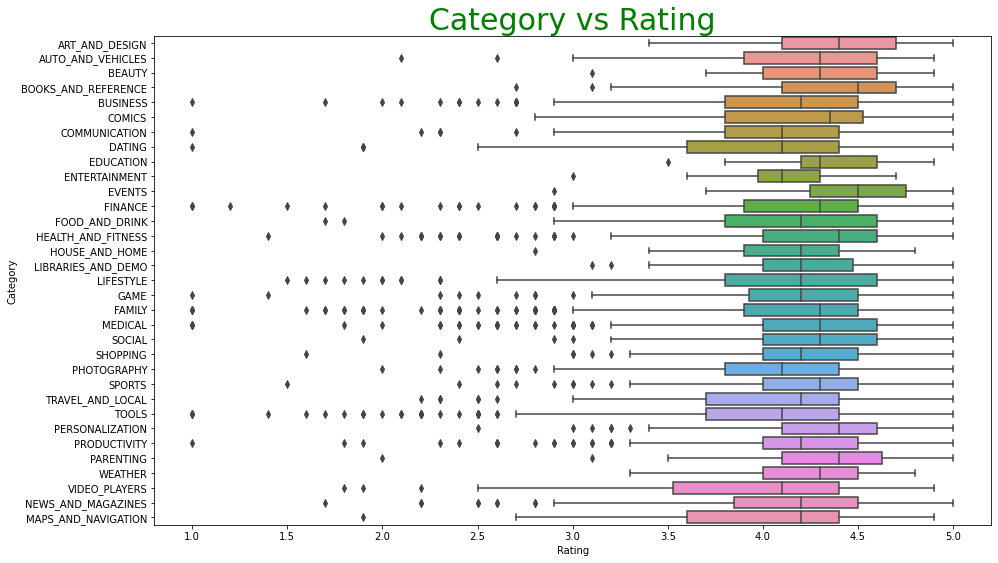

In [70]:
plt.figure(figsize=(15,9))
sns.boxplot(storedata['Rating'], storedata['Category'])
plt.xlabel('Rating')
plt.ylabel('Category')
plt.title('Category vs Rating',loc='center', fontsize=30, color='green')

### Here by seeing boxplot I can say that Event is having best Rating because there is no outliers

## 8 Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

### 8:1 Reviews and Install have some values that are still relatively very high.

Before building a linear regression model, you need to reduce the skew.

Apply log transformation (np.log1p) to Reviews and Installs.

In [71]:
inp1= storedata.copy()

In [72]:
inp1.shape

(6506, 13)

In [73]:
q1,q3=np.percentile(inp1.Reviews,[25,75])
iqr= q3-q1
iqr

7897.5

In [74]:
outliers1= inp1[(inp1.Reviews>q3+1.5*iqr) | (inp1.Reviews<q1-1.5*iqr)]
len(outliers1)

957

{'whiskers': [<matplotlib.lines.Line2D at 0x2d9023a7490>,
 'caps': [<matplotlib.lines.Line2D at 0x2d9023a7b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d9023a7130>],
 'medians': [<matplotlib.lines.Line2D at 0x2d9023b3250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d9023b35b0>],
 'means': []}

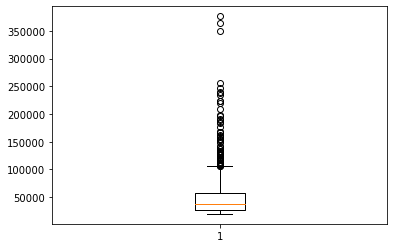

In [75]:
plt.boxplot(outliers1['Reviews'])

In [76]:
outliers = outliers1.index

In [77]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up


In [78]:
inp1.drop(labels=outliers, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d90240b2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d90240b9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d9023fdf40>],
 'medians': [<matplotlib.lines.Line2D at 0x2d9024170a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d902417430>],
 'means': []}

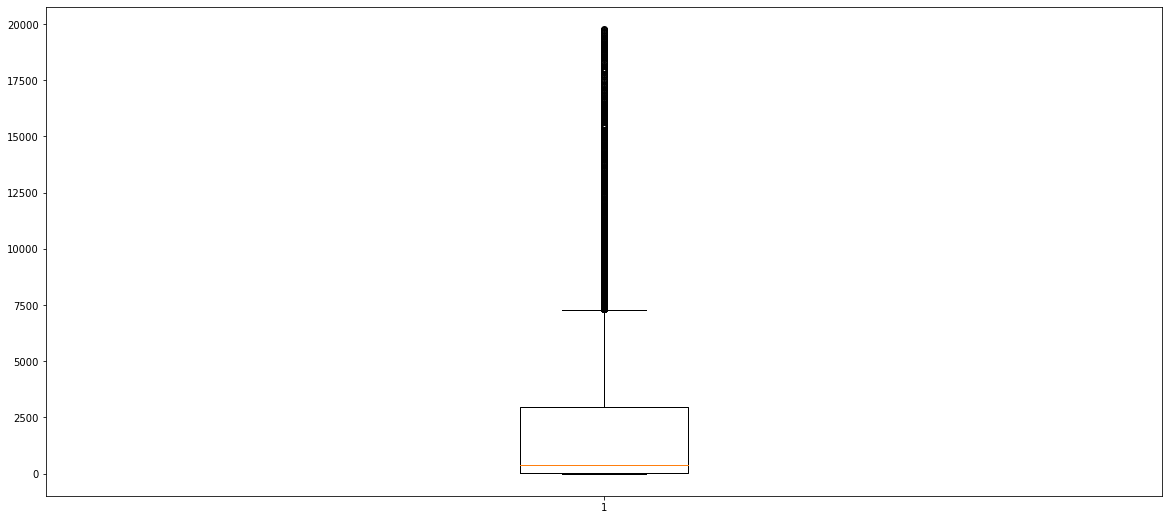

In [79]:
plt.figure(figsize=(20,9))
plt.boxplot(inp1['Reviews'])

In [80]:
inp1.Reviews.value_counts()

2        81
3        78
5        74
4        73
1        67
         ..
14283     1
1228      1
7379      1
6079      1
12304     1
Name: Reviews, Length: 2559, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

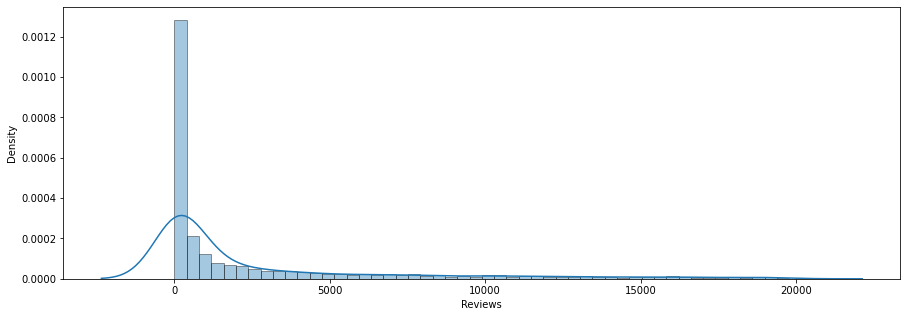

In [81]:
plt.figure(figsize=(15,5))
sns.distplot(inp1.Reviews, hist=True, hist_kws=dict(ec='k')) # skewed dataset

In [82]:
inp1.Reviews.describe()
#'''Here we can see that data is not normally distributed because we can see that there is a huge difference in 
#mean and std similarlly there is relatively very heigh difference in min and max '''

count     5549.000000
mean      2588.472878
std       4399.753156
min          1.000000
25%         42.000000
50%        360.000000
75%       2943.000000
max      19784.000000
Name: Reviews, dtype: float64

In [83]:
inp1.Reviews= inp1.Reviews.apply(np.log1p)
# Applying log function to normalize the data.

In [84]:
inp1.Reviews.describe()

count    5549.000000
mean        5.804859
std         2.506471
min         0.693147
25%         3.761200
50%         5.888878
75%         7.987524
max         9.892679
Name: Reviews, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

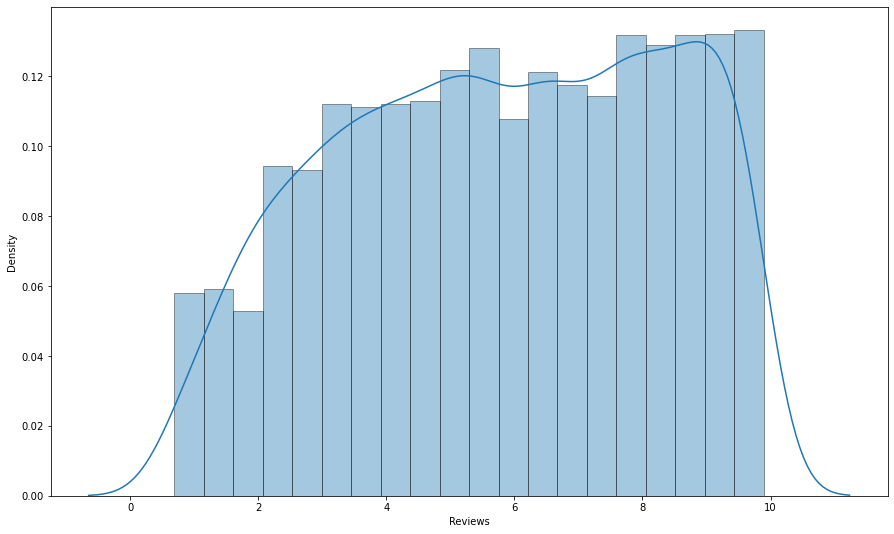

In [85]:
plt.figure(figsize=(15,9))
sns.distplot(inp1['Reviews'],hist=True, hist_kws=dict(ec='k'))

In [86]:
inp1.Installs.describe()

count       5549.000000
mean      196154.768427
std       334101.009166
min            5.000000
25%         5000.000000
50%        10000.000000
75%       100000.000000
max      1000000.000000
Name: Installs, dtype: float64

### '''For Installs also we can see that data is not normally distributed because we can see that there is a huge difference in mean and std similarlly there is relatively very heigh difference in min and max '''

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Installs'>

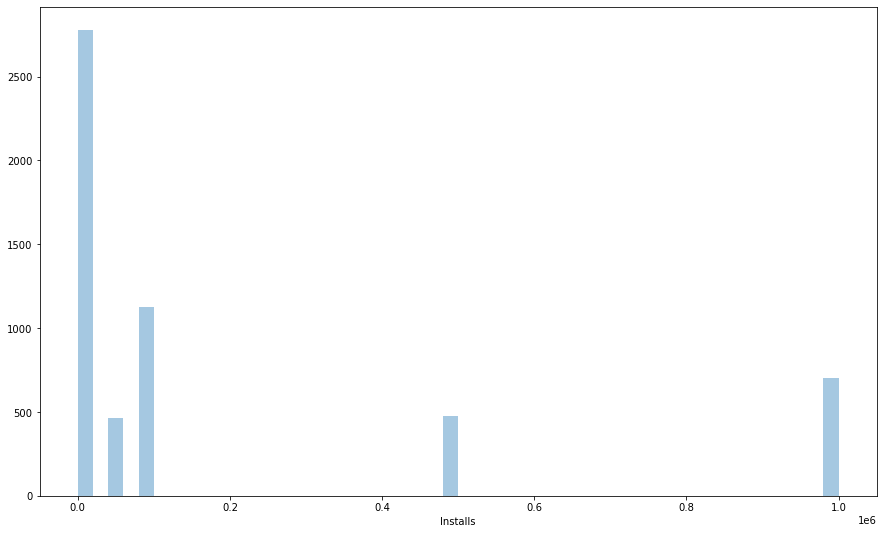

In [87]:
plt.figure(figsize=(15,9))
sns.distplot(inp1.Installs, hist=True, kde=False)

In [88]:
inp1.Installs= inp1.Installs.apply(np.log1p)
# Applying log function to normalize the data.

In [89]:
inp1.Installs.describe()

count    5549.000000
mean        9.874105
std         2.824880
min         1.791759
25%         8.517393
50%         9.210440
75%        11.512935
max        13.815512
Name: Installs, dtype: float64

<AxesSubplot:xlabel='Installs'>

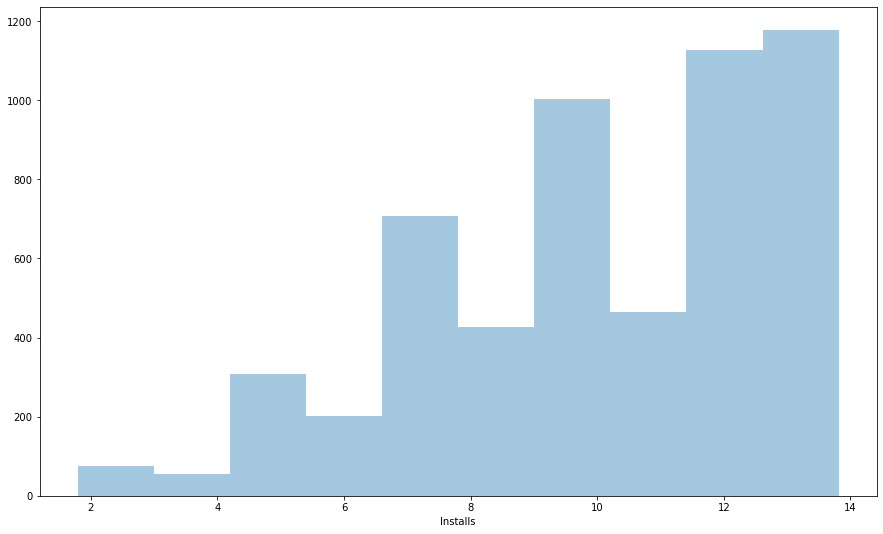

In [90]:
plt.figure(figsize=(15,9))
sns.distplot(inp1.Installs,hist=True,kde=False, bins=10)

## 8:2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [91]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [92]:
inp1.shape

(5549, 13)

In [93]:
#Dropped App, Last Updated, Current Ver, and Android Ver.
inp1.drop(['App', 'Last Updated','Current Ver','Android Ver'],axis= 1, inplace=True)

In [94]:
inp1.columns #checking updated columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

## 8:3 Get dummy columns for Category, Genres, and Content Rating.

This needs to be done as the models do not understand categorical data, and all data should be numeric.

Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.


In [95]:
inp1['Reviews'].dtype

dtype('float64')

In [96]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5549 entries, 0 to 10839
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        5549 non-null   object 
 1   Rating          5549 non-null   float64
 2   Reviews         5549 non-null   float64
 3   Size            5549 non-null   float64
 4   Installs        5549 non-null   float64
 5   Type            5549 non-null   object 
 6   Price           5549 non-null   float64
 7   Content Rating  5549 non-null   object 
 8   Genres          5549 non-null   object 
dtypes: float64(5), object(4)
memory usage: 433.5+ KB


In [97]:
inp1['Reviews']

0        5.075174
1        6.875232
4        6.875232
5        5.123964
6        5.187386
           ...   
10833    3.806662
10834    2.079442
10836    3.663562
10837    1.609438
10839    4.744932
Name: Reviews, Length: 5549, dtype: float64

In [98]:
#Creating dummy column for Category, Genres, and Content Rating, which shows numaric binary values.
inp2 = pd.get_dummies(inp1,columns=['Category','Genres','Content Rating'],drop_first=True)
inp2.head()

,Rating,Reviews,Size,Installs,Type,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,3.8,5.187386,19000.0,10.819798,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [99]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5549 entries, 0 to 10839
Columns: 143 entries, Rating to Content Rating_Unrated
dtypes: float64(5), object(1), uint8(137)
memory usage: 1.0+ MB


## 9: Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
inp2.head(20)

,Rating,Reviews,Size,Installs,Type,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,3.8,5.187386,19000.0,10.819798,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,4.4,9.531844,33000.0,13.815512,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,4.7,4.804021,3100.0,9.210440,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,4.4,9.538276,28000.0,13.815512,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,4.4,9.081256,12000.0,13.815512,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13,4.6,8.372630,21000.0,11.512935,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [102]:
inp2.corr()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
Rating,1.000000,0.042957,0.008686,-0.072247,0.041800,0.007010,0.019735,0.045479,-0.012522,0.003837,...,-0.000131,-0.009329,-0.048123,0.008655,0.012916,-0.005240,0.004855,-0.028940,0.026445,-0.000131
Reviews,0.042957,1.000000,0.138662,0.914899,-0.045979,0.003657,-0.002673,-0.022505,-0.073271,0.023513,...,0.005290,0.008256,0.022827,0.074407,-0.007469,-0.120161,0.078413,0.054319,0.069601,0.006826
Size,0.008686,0.138662,1.000000,0.117977,0.035036,0.012379,-0.012225,-0.035295,-0.050666,-0.021903,...,-0.006222,0.004042,-0.042967,-0.035509,0.014156,-0.158438,0.094750,0.050661,0.115206,-0.007044
Installs,-0.072247,0.914899,0.117977,1.000000,-0.131158,0.019889,0.019613,-0.012150,-0.069648,0.021938,...,0.007789,0.002214,0.031702,0.065745,-0.014975,-0.086781,0.058403,0.046557,0.043492,0.004495
Price,0.041800,-0.045979,0.035036,-0.131158,1.000000,-0.019202,-0.015402,-0.017649,-0.015197,-0.016843,...,-0.002559,-0.012296,-0.018573,-0.001285,-0.006774,0.008016,0.020169,-0.010155,-0.014396,-0.002559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Content Rating_Everyone,-0.005240,-0.120161,-0.158438,-0.086781,0.008016,0.042035,0.016808,0.037691,0.080478,-0.073769,...,0.005848,0.005119,0.011393,0.026683,-0.012253,1.000000,-0.385259,-0.511039,-0.697529,-0.030820
Content Rating_Everyone 10+,0.004855,0.078413,0.094750,0.058403,0.020169,-0.007563,-0.013561,-0.009769,-0.034818,0.010352,...,-0.002253,-0.010827,-0.012293,-0.014656,0.025141,-0.385259,1.000000,-0.037359,-0.050992,-0.002253
Content Rating_Mature 17+,-0.028940,0.054319,0.050661,0.046557,-0.010155,-0.023855,-0.007406,-0.021414,-0.046186,0.048155,...,-0.002989,-0.014362,-0.021256,-0.019441,0.016026,-0.511039,-0.037359,1.000000,-0.067640,-0.002989
Content Rating_Teen,0.026445,0.069601,0.115206,0.043492,-0.014396,-0.032561,-0.008414,-0.027358,-0.050012,0.047031,...,-0.004079,0.010649,0.008588,-0.011585,-0.010799,-0.697529,-0.050992,-0.067640,1.000000,-0.004079


In [103]:
inp2.drop('Type',axis=1, inplace=True)

In [104]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,3.8,5.187386,19000.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 10. Separate the dataframes into X_train, y_train, X_test, and y_test

In [105]:
X = inp2.iloc[:,1:]
y = inp2.iloc[:,:1]
# since it is multivariate analysis where my dependent(target) variable is Rating and Independent variable is Price.

In [106]:
X.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,5.187386,19000.0,10.819798,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=120)
#Splitting the dataset.. 70 for training and 30 for testing.

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3884, 141)
(1665, 141)
(3884, 1)
(1665, 1)


### 11. Model building

In [109]:
#building the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Evaluation: To check the model quality

In [110]:
# coefficient shows stength and direction of relation.
print(lm.coef_)

[[ 1.76992112e-01 -7.18094170e-07 -1.55929764e-01 -9.49874661e-03
   2.78777696e-02  1.20188069e-01  8.48031466e-02 -3.92846803e-02
   2.46317625e-01 -7.95111012e-02 -1.54310184e-01 -2.44395770e-01
  -1.78336560e-01  1.58046687e-01 -2.39180772e-01 -5.95911327e-02
  -6.85111893e-02 -1.56047250e-02 -3.67861682e-02  6.36386766e-04
   8.38572654e-02 -3.66714726e-02 -1.12674551e-01  3.51535767e-02
  -5.11809690e-02  1.58562867e-01  8.45151342e-02 -5.73223894e-02
  -6.62639011e-02 -5.52367954e-02 -6.40994648e-03 -2.48340611e-02
  -8.66573042e-02 -6.94362970e-02 -1.24773341e-01 -1.60526344e-02
   2.97080778e-01 -3.13204190e-02  1.75768883e-02  4.47674277e-01
  -6.94169354e-02  3.98754412e-01  3.06583452e-01  4.62499805e-01
   8.91819962e-02  2.78777696e-02  1.20188069e-01  5.85972271e-02
  -1.82753812e-12  2.68766640e-01  8.63344514e-01  8.48031465e-02
   2.09933588e-01 -3.92846803e-02 -2.40347021e-01  6.46969895e-01
   5.14593465e-02  5.80959887e-02  4.13347896e-01  5.55489608e-01
   2.68659

In [111]:
#checking intercept of the line
print(lm.intercept_)

[4.27181937]


In [112]:
prediction = lm.predict(X_test)
print(prediction) #Make predictions on test set 

[[4.09737547]
 [4.34754104]
 [4.49484114]
 ...
 [4.18367361]
 [3.92400814]
 [3.92220268]]


In [113]:
y_test.head()

,Rating
7611,4.1
7039,4.1
4577,4.5
3658,4.8
7495,3.6


In [114]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, prediction)
r_square = r2_score(y_test, prediction) #Report the R2 on the test set

In [115]:
print(mse)
print(r_square)

0.2978169086429528
0.09917474610514432


In [116]:
lm.score(X_test,y_test)

0.09917474610514432

### So, the r-square is low that means the independent variables are not impacting on depndent variable. It means, we can not predict which app will have higer rating so we need to apply another machine learning algorithm to find the better possible solution for it.